## "Análisis de Probabilidades y Valores P en Distribuciones Estadísticas Clásicas"



In [3]:
# Referencia: http://eric.univ-lyon2.fr/~ricco/tanagra/fichiers/en_Tanagra_Calcul_P_Value.pdf
import numpy as np
import scipy.stats as stats
from scipy.stats import poisson, chi2

# Función para imprimir resultados con contexto
def print_result(description, value):
    print(f"{description}: {value:.4f}")

# 1. Probabilidad (p-valor) de que en una distribución Poisson (μ=2.55) ocurran >=5 eventos
p_poisson = poisson.sf(4, 2.55)  # sf: Survival Function (1 - CDF)
print_result("P(Poisson, λ=2.55, X>=5)", p_poisson)

# 2. CDF de la distribución normal estándar (μ=0, σ=1) para X < 1.65
p_normal_cdf = stats.norm.cdf(1.65, loc=0, scale=1)
print_result("P(Normal, μ=0, σ=1, X<1.65)", p_normal_cdf)

# 3. p-valor para una prueba unilateral a la derecha en la distribución normal estándar con Z=2.1
p_normal_right = stats.norm.sf(2.1)  # sf: Survival Function
print_result("P(Normal, μ=0, σ=1, X>2.1)", p_normal_right)

# 4. p-valor para una prueba bilateral en la distribución normal estándar con |Z| > 2.1
p_normal_two_tailed = 2 * stats.norm.sf(2.1)
print_result("P(Normal, μ=0, σ=1, |X|>2.1)", p_normal_two_tailed)

# 5. Percent-point function (PPF) para la distribución normal estándar con probabilidad acumulada 0.95
ppf_normal = stats.norm.ppf(0.95, loc=0, scale=1)
print_result("PPF(Normal, μ=0, σ=1, P=0.95)", ppf_normal)

# 6. CDF de la distribución t-Student (k=10) para T < 1.5
p_t_cdf = stats.t.cdf(1.5, df=10)
print_result("P(t-Student, k=10, T<1.5)", p_t_cdf)

# 7. PPF para la distribución t-Student (k=10) con probabilidad acumulada 0.95
ppf_t = stats.t.ppf(0.95, df=10)
print_result("PPF(t-Student, k=10, P=0.95)", ppf_t)

# 8. CDF de la distribución chi-cuadrado (k=5) para X < 12.0
p_chi2_cdf = chi2.cdf(12.0, df=5)
print_result("P(Chi², k=5, X<12.0)", p_chi2_cdf)

# 9. PPF para la distribución chi-cuadrado (k=7) con probabilidad acumulada 0.95
ppf_chi2 = chi2.ppf(0.95, df=7)
print_result("PPF(Chi², k=7, P=0.95)", ppf_chi2)


P(Poisson, λ=2.55, X>=5): 0.1156
P(Normal, μ=0, σ=1, X<1.65): 0.9505
P(Normal, μ=0, σ=1, X>2.1): 0.0179
P(Normal, μ=0, σ=1, |X|>2.1): 0.0357
PPF(Normal, μ=0, σ=1, P=0.95): 1.6449
P(t-Student, k=10, T<1.5): 0.9177
PPF(t-Student, k=10, P=0.95): 1.8125
P(Chi², k=5, X<12.0): 0.9652
PPF(Chi², k=7, P=0.95): 14.0671


## "Cinturón de Confianza para Distribución de Poisson usando la Distribución Chi-Cuadrado"








Límites inferiores: [       nan 0.17435339 0.71203767 1.37293416 2.09280863 2.84878446
 3.62974282 4.42930446 5.24341221 6.06929746 6.90497151 7.74894907]
Límites superiores: [ 1.83258146  3.28852411  4.62498773  5.90376741  7.14698561  8.36549275
  9.56555132 10.75116008 11.92505523 13.08920609 14.24508571 15.39382996]


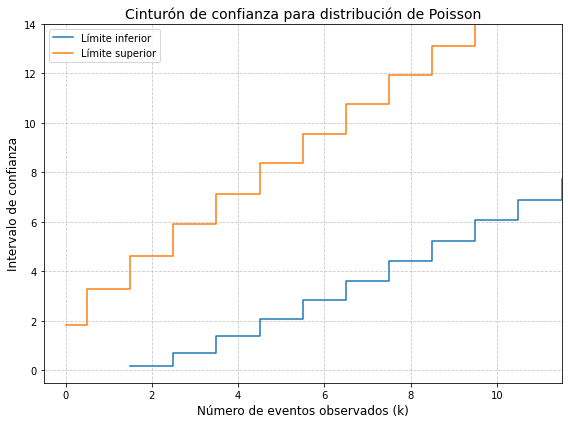

In [5]:
# Referencia: http://materias.df.uba.ar/estadisticaa2017c1/files/2012/07/Poisson_limite_exacto.py
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

# Nivel de confianza
alpha = 0.68  # Porcentaje de confianza (68%)

# Cálculo de los límites del intervalo
L = (1 - alpha) / 2  # Límite inferior
R = L  # Límite superior, simétrico para este caso

# Valores de k (número de eventos observados)
k = np.arange(0, 12)

# Límites inferior y superior basados en la distribución Chi-cuadrado
a = chi2.ppf(L, 2 * k) / 2  # Límite inferior
b = chi2.ppf(1 - R, 2 * (k + 1)) / 2  # Límite superior

# Imprimir los resultados
print("Límites inferiores:", a)
print("Límites superiores:", b)

# Graficar los intervalos de confianza
plt.figure(figsize=(8, 6))
plt.step(k + 1, a, label='Límite inferior', where='mid')
plt.step(k, b, label='Límite superior', where='mid')
plt.title("Cinturón de confianza para distribución de Poisson", fontsize=14)
plt.xlabel("Número de eventos observados (k)", fontsize=12)
plt.ylabel("Intervalo de confianza", fontsize=12)
plt.legend(loc='upper left', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlim(-0.5, 11.5)
plt.ylim(-0.5, 14)
plt.tight_layout()
plt.show()


## Discriminadores lineales y cuadráticos


Linear and Quadratic Discriminant Analysis with covariance ellipsoid

This example plots the covariance ellipsoids of each class and
decision boundary learned by LDA and QDA. The ellipsoids display
the double standard deviation for each class. With LDA, the
standard deviation is the same for all the classes, while each
class has its own standard deviation with QDA.



C:\Users\Nati\AppData\Local\Temp/ipykernel_26636/628970872.py:95: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
C:\Users\Nati\AppData\Local\Temp/ipykernel_26636/628970872.py:95: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
C:\Users\Nati\AppData\Local\Temp/ipykernel_26636/628970872.py:95: MatplotlibDeprecationWarning: shading='flat' when X and Y have the sam

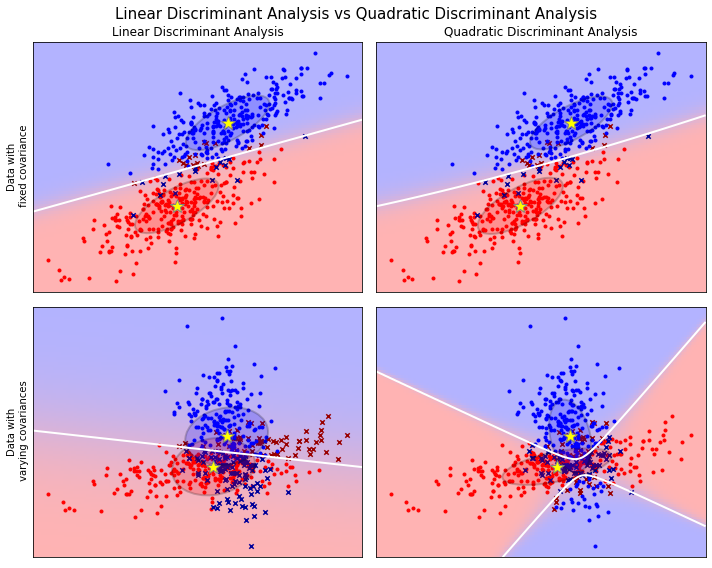

In [6]:
#https://scikit-learn.org/stable/auto_examples/classification/plot_lda_qda.html
#https://scikit-learn.org/stable/modules/lda_qda.html
"""
====================================================================
Linear and Quadratic Discriminant Analysis with covariance ellipsoid
====================================================================

This example plots the covariance ellipsoids of each class and
decision boundary learned by LDA and QDA. The ellipsoids display
the double standard deviation for each class. With LDA, the
standard deviation is the same for all the classes, while each
class has its own standard deviation with QDA.
"""
print(__doc__)

from scipy import linalg
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import colors

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# #############################################################################
# Colormap
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)


# #############################################################################
# Generate datasets
def dataset_fixed_cov():
    '''Generate 2 Gaussians samples with the same covariance matrix'''
    n, dim = 300, 2
    np.random.seed(0)
    C = np.array([[0., -0.23], [0.83, .23]])
    X = np.r_[np.dot(np.random.randn(n, dim), C),
              np.dot(np.random.randn(n, dim), C) + np.array([1, 1])]
    y = np.hstack((np.zeros(n), np.ones(n)))
    return X, y


def dataset_cov():
    '''Generate 2 Gaussians samples with different covariance matrices'''
    n, dim = 300, 2
    np.random.seed(0)
    C = np.array([[0., -1.], [2.5, .7]]) * 2.
    X = np.r_[np.dot(np.random.randn(n, dim), C),
              np.dot(np.random.randn(n, dim), C.T) + np.array([1, 4])]
    y = np.hstack((np.zeros(n), np.ones(n)))
    return X, y


# #############################################################################
# Plot functions
def plot_data(lda, X, y, y_pred, fig_index):
    splot = plt.subplot(2, 2, fig_index)
    if fig_index == 1:
        plt.title('Linear Discriminant Analysis')
        plt.ylabel('Data with\n fixed covariance')
    elif fig_index == 2:
        plt.title('Quadratic Discriminant Analysis')
    elif fig_index == 3:
        plt.ylabel('Data with\n varying covariances')

    tp = (y == y_pred)  # True Positive
    tp0, tp1 = tp[y == 0], tp[y == 1]
    X0, X1 = X[y == 0], X[y == 1]
    X0_tp, X0_fp = X0[tp0], X0[~tp0]
    X1_tp, X1_fp = X1[tp1], X1[~tp1]

    # class 0: dots
    plt.scatter(X0_tp[:, 0], X0_tp[:, 1], marker='.', color='red')
    plt.scatter(X0_fp[:, 0], X0_fp[:, 1], marker='x',
                s=20, color='#990000')  # dark red

    # class 1: dots
    plt.scatter(X1_tp[:, 0], X1_tp[:, 1], marker='.', color='blue')
    plt.scatter(X1_fp[:, 0], X1_fp[:, 1], marker='x',
                s=20, color='#000099')  # dark blue

    # class 0 and 1 : areas
    nx, ny = 200, 100
    x_min, x_max = plt.xlim()
    y_min, y_max = plt.ylim()
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
    Z = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    Z = Z[:, 1].reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=0)
    plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

    # means
    plt.plot(lda.means_[0][0], lda.means_[0][1],
             '*', color='yellow', markersize=15, markeredgecolor='grey')
    plt.plot(lda.means_[1][0], lda.means_[1][1],
             '*', color='yellow', markersize=15, markeredgecolor='grey')

    return splot


def plot_ellipse(splot, mean, cov, color):
    v, w = linalg.eigh(cov)
    u = w[0] / linalg.norm(w[0])
    angle = np.arctan(u[1] / u[0])
    angle = 180 * angle / np.pi  # convert to degrees
    # filled Gaussian at 2 standard deviation
    ell = mpl.patches.Ellipse(mean, 2 * v[0] ** 0.5, 2 * v[1] ** 0.5,
                              180 + angle, facecolor=color,
                              edgecolor='black', linewidth=2)
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(0.2)
    splot.add_artist(ell)
    splot.set_xticks(())
    splot.set_yticks(())


def plot_lda_cov(lda, splot):
    plot_ellipse(splot, lda.means_[0], lda.covariance_, 'red')
    plot_ellipse(splot, lda.means_[1], lda.covariance_, 'blue')


def plot_qda_cov(qda, splot):
    plot_ellipse(splot, qda.means_[0], qda.covariance_[0], 'red')
    plot_ellipse(splot, qda.means_[1], qda.covariance_[1], 'blue')


plt.figure(figsize=(10, 8), facecolor='white')
plt.suptitle('Linear Discriminant Analysis vs Quadratic Discriminant Analysis',
             y=0.98, fontsize=15)

for i, (X, y) in enumerate([dataset_fixed_cov(), dataset_cov()]):
    # Linear Discriminant Analysis
    lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
    y_pred = lda.fit(X, y).predict(X)
    splot = plot_data(lda, X, y, y_pred, fig_index=2 * i + 1)
    plot_lda_cov(lda, splot)
    plt.axis('tight')

    # Quadratic Discriminant Analysis
    qda = QuadraticDiscriminantAnalysis(store_covariance=True)
    y_pred = qda.fit(X, y).predict(X)
    splot = plot_data(qda, X, y, y_pred, fig_index=2 * i + 2)
    plot_qda_cov(qda, splot)
    plt.axis('tight')
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

## Clasificación de Imágenes con Fashion MNIST Usando TensorFlow y Keras

2.8.0
(60000, 28, 28)
60000
[9 0 0 ... 3 0 5]
(10000, 28, 28)
10000


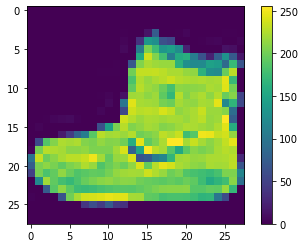

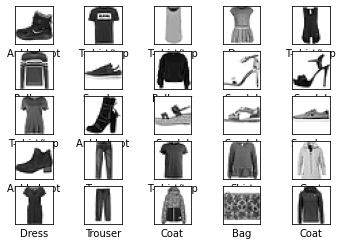

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4960 - accuracy: 0.8252
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3758 - accuracy: 0.8645
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3375 - accuracy: 0.8776
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3153 - accuracy: 0.8844
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2973 - accuracy: 0.8916
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2814 - accuracy: 0.8956
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2715 - accuracy: 0.9001
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2580 - accuracy: 0.9042
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2500 - accuracy: 0.9050
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.239

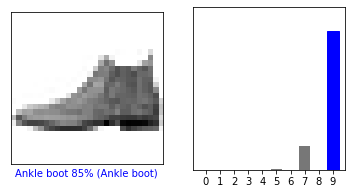

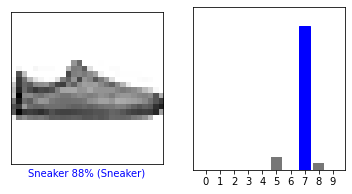

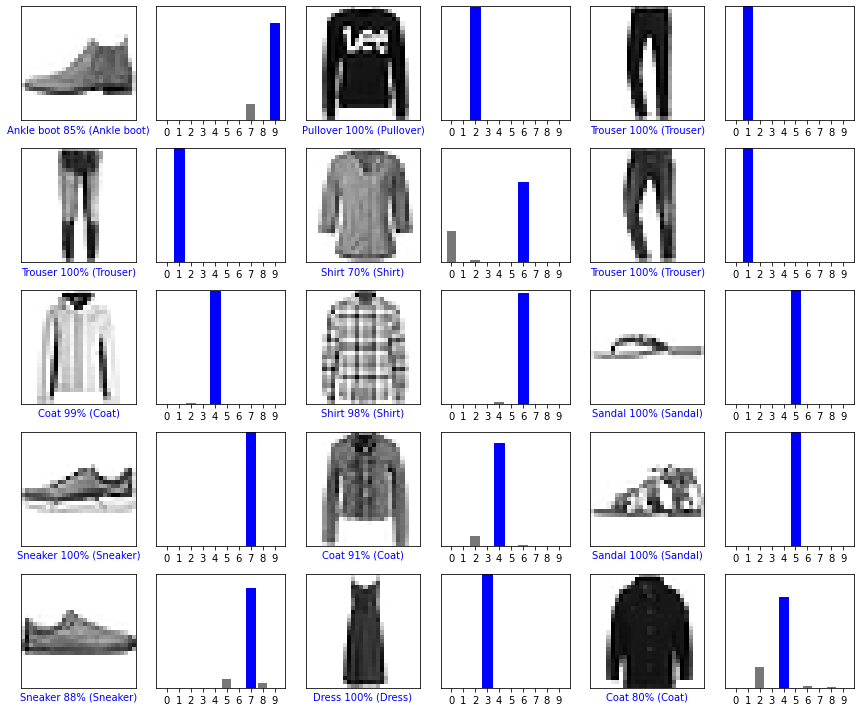

(28, 28)
(1, 28, 28)
[[7.0931856e-05 1.9433515e-12 9.9875247e-01 5.9983649e-09 1.0228121e-03
  1.1362294e-15 1.5387584e-04 1.6686109e-17 1.0877891e-08 3.4714611e-13]]


2

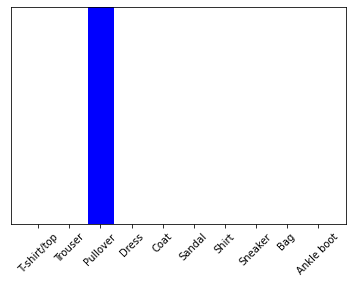

In [7]:
#https://www.tensorflow.org/tutorials/keras/classification
#
# !!!!!!! Needs to run with python3.7 !!!!!!!
#
# TensorFlow y tf.keras
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.


import tensorflow as tf
from tensorflow import keras

# Librerias de ayuda
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print(train_images.shape)

print(len(train_labels))

print(train_labels)

print(test_images.shape)

print(len(test_labels))

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()
train_images = train_images / 255.0

test_images = test_images / 255.0

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=10)
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)


probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
predictions[0]
np.argmax(predictions[0])
test_labels[0]


def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()


# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)
predictions_single = probability_model.predict(img)

print(predictions_single)
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)


np.argmax(predictions_single[0])




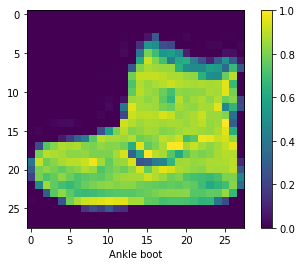

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4917 - accuracy: 0.8264
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3737 - accuracy: 0.8644
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3355 - accuracy: 0.8771
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3101 - accuracy: 0.8859
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2922 - accuracy: 0.8917
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2783 - accuracy: 0.8979
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2651 - accuracy: 0.9006
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2566 - accuracy: 0.9040
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2458 - accuracy: 0.9083
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.237

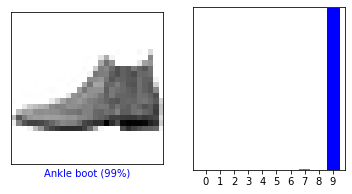

In [8]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

#https://www.tensorflow.org/tutorials/keras/classification
#
# !!!!!!! Needs to run with python3.7 !!!!!!!
#
# TensorFlow y tf.keras
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.




# Cargar el dataset Fashion MNIST
def load_data():
    fashion_mnist = keras.datasets.fashion_mnist
    (train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
    return train_images, train_labels, test_images, test_labels

# Normalizar las imágenes
def preprocess_images(train_images, test_images):
    train_images = train_images / 255.0
    test_images = test_images / 255.0
    return train_images, test_images

# Visualizar una imagen
def display_image(image, label, class_names):
    plt.figure()
    plt.imshow(image)
    plt.colorbar()
    plt.grid(False)
    plt.xlabel(class_names[label])
    plt.show()

# Construir el modelo
def build_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10)
    ])
    model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])
    return model

# Entrenmiento
def train_model(model, train_images, train_labels):
    model.fit(train_images, train_labels, epochs=10)

# Evaluación el modelo
def evaluate_model(model, test_images, test_labels):
    test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
    print('\nTest accuracy:', test_acc)
    return test_acc

# Predicciones
def make_predictions(model, test_images):
    probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
    predictions = probability_model.predict(test_images)
    return predictions

# Visualización de los resultados de las predicciones
def plot_image_with_prediction(i, predictions_array, true_label, img, class_names):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([]), plt.yticks([])  
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    color = 'blue' if predicted_label == true_label else 'red'

    plt.xlabel(f"{class_names[predicted_label]} ({100*np.max(predictions_array):2.0f}%)", color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

# Principal: carga de datos, preprocesamiento, entrenamiento, y visualización
def main():
    # Cargar y preprocesar los datos
    train_images, train_labels, test_images, test_labels = load_data()
    train_images, test_images = preprocess_images(train_images, test_images)

    # Mostrar una imagen del dataset
    class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
    display_image(train_images[0], train_labels[0], class_names)

    # Construir, entrenar y evaluar el modelo
    model = build_model()
    train_model(model, train_images, train_labels)
    test_acc = evaluate_model(model, test_images, test_labels)

    # Realizo predicciones y visualizo resultados
    predictions = make_predictions(model, test_images)
    i = 0  # Índice de la imagen a visualizar
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plot_image_with_prediction(i, predictions[i], test_labels, test_images, class_names)
    plt.subplot(1,2,2)
    plot_value_array(i, predictions[i], test_labels)
    plt.show()

# Ejecutar el flujo principal
if __name__ == "__main__":
    main()


## Comparación de Distribuciones Salariales entre 1989 y 1990 Usando la Prueba de Kolmogorov-Smirnov

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1476 entries, 0 to 1475
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    1476 non-null   object 
 1   salary  1476 non-null   float64
dtypes: float64(1), object(1)
memory usage: 23.2+ KB


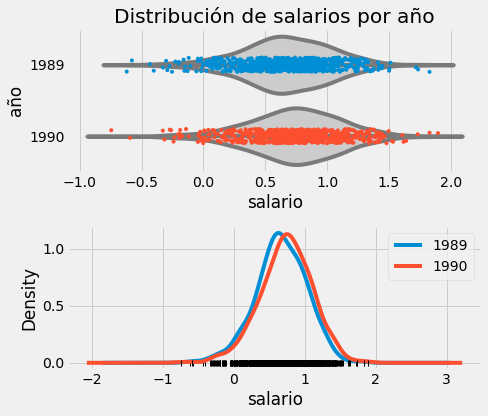

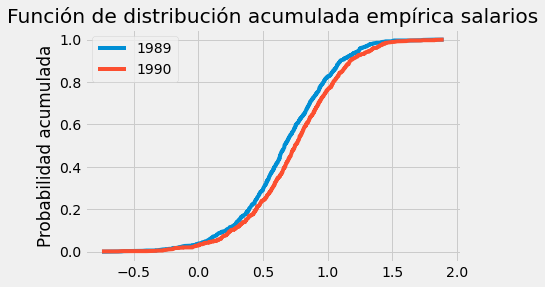

Distancia Kolmogorov–Smirnov: 0.1057
KstestResult(statistic=0.10569105691056911, pvalue=0.0005205845230085144)


In [9]:
#https://www.cienciadedatos.net/documentos/pystats08-comparacion-distribuciones-test-kolmogorov-smirnov-python.html

# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
#%matplotlib inline
plt.style.use('fivethirtyeight')
import seaborn as sns

# Modelado y test estadísticos
# ==============================================================================
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.stats import ks_2samp

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

# Datos
# ==============================================================================
url = ('https://raw.githubusercontent.com/JoaquinAmatRodrigo/'
       'Estadistica-machine-learning-python/master/data/Snmesp.csv')
datos = pd.read_csv(url)
datos['year'] = datos['year'].astype(str) 
datos.info()

# Gráficos distribución observada
# ==============================================================================
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(7, 6))
sns.violinplot(
    x     = datos.salary,
    y     = datos.year,
    color = ".8",
    ax    = axs[0]
)

sns.stripplot(
    x     = datos.salary,
    y     = datos.year,
    data = datos,
    size = 4,
    jitter  = 0.1,
    ax = axs[0]
)
axs[0].set_title('Distribución de salarios por año')
axs[0].set_ylabel('año')
axs[0].set_xlabel('salario');

for year in datos.year.unique():
    datos_temp = datos[datos.year == year]['salary']
    datos_temp.plot.kde(ax=axs[1], label=year)
    axs[1].plot(datos_temp, np.full_like(datos_temp, 0), '|k', markeredgewidth=1)

#axs[1].set_xlabel('año');
axs[1].set_xlabel('salario');
axs[1].legend()

fig.tight_layout();

plt.show()


# Ajuste de las funciones ecdf con cada muestra
# ==============================================================================
ecdf_1989 = ECDF(datos.loc[datos.year == '1989', 'salary'])
ecdf_1990 = ECDF(datos.loc[datos.year == '1990', 'salary'])

# Estimación de la probabilidad acumulada de cada valor de salario observado
# ==============================================================================
grid_salario = np.sort(datos.salary.unique())
prob_acumulada_ecdf_1989 = ecdf_1989(grid_salario)
prob_acumulada_ecdf_1990 = ecdf_1990(grid_salario)


# Representación gráfica de las curvas ecdf
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(grid_salario, prob_acumulada_ecdf_1989, label='1989')
ax.plot(grid_salario, prob_acumulada_ecdf_1990, label='1990')
ax.set_title("Función de distribución acumulada empírica salarios")
ax.set_ylabel("Probabilidad acumulada")
ax.legend();

plt.show()

# Representación gráfica de las curvas ecdf
# ==============================================================================
# fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
# sns.ecdfplot(data=datos, x="salary", hue='year', ax=ax)
# ax.set_title("Función de distribución acumulada empírica salarios")
# ax.set_ylabel("Probabilidad acumulada");

# Distancia Kolmogorov–Smirnov
# ==============================================================================
abs_dif = np.abs(prob_acumulada_ecdf_1989 - prob_acumulada_ecdf_1990)
distancia_ks = np.max(abs_dif)
print(f"Distancia Kolmogorov–Smirnov: {distancia_ks :.4f}")

plt.show()

# Test Kolmogorov–Smirnov entre dos muestras
# ==============================================================================
KS_testResult = ks_2samp(
    datos.loc[datos.year == '1989', 'salary'],
    datos.loc[datos.year == '1990', 'salary']
)

print(KS_testResult)